<a href="https://colab.research.google.com/github/hrithikpurwar/ML/blob/main/RandomForestTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [75]:
df=pd.read_csv('/content/foodDiet.csv')

In [76]:
df.shape

(192, 7)

In [4]:
df.isnull().sum()

Person          0
gender          0
Age             0
Height          0
pre.weight      0
Diet            0
weight6weeks    0
dtype: int64

In [6]:
df.dtypes

Person            int64
gender            int64
Age               int64
Height            int64
pre.weight        int64
Diet              int64
weight6weeks    float64
dtype: object

In [77]:
final_dataset=df[['gender','Age','Height','pre.weight','Diet','weight6weeks']]
final_dataset['preweight']=final_dataset['pre.weight']
final_dataset['weightafter']=final_dataset['weight6weeks']
final_dataset.drop(['pre.weight'],axis=1,inplace=True)
final_dataset.drop(['weight6weeks'],axis=1,inplace=True)

In [78]:
final_dataset.head()

,gender,Age,Height,Diet,preweight,weightafter
0,0,41,171,2,60,60.0
1,0,32,174,2,103,103.0
2,0,22,159,1,58,54.2
3,0,46,192,1,60,54.0
4,0,55,170,1,64,63.3


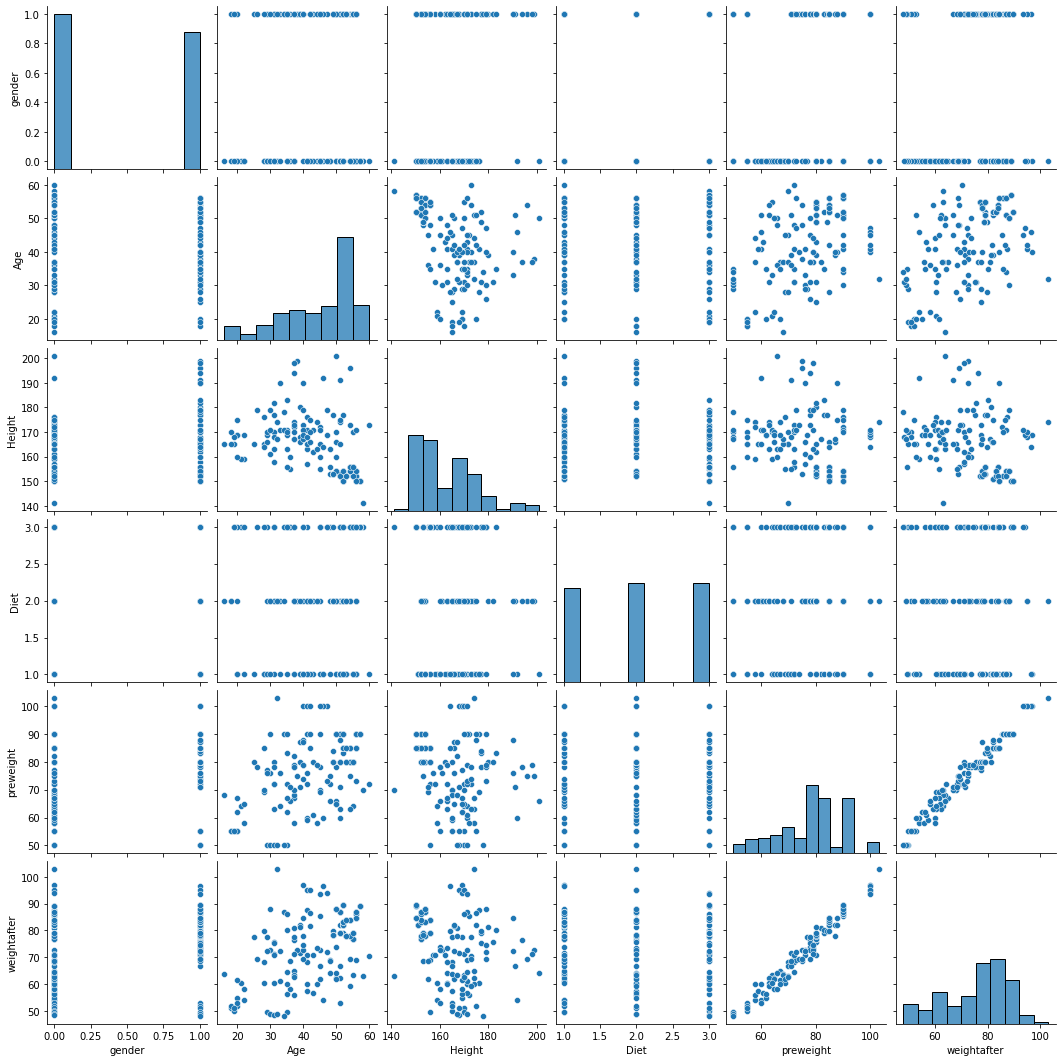

In [9]:
import seaborn as sns
sns.pairplot(final_dataset)

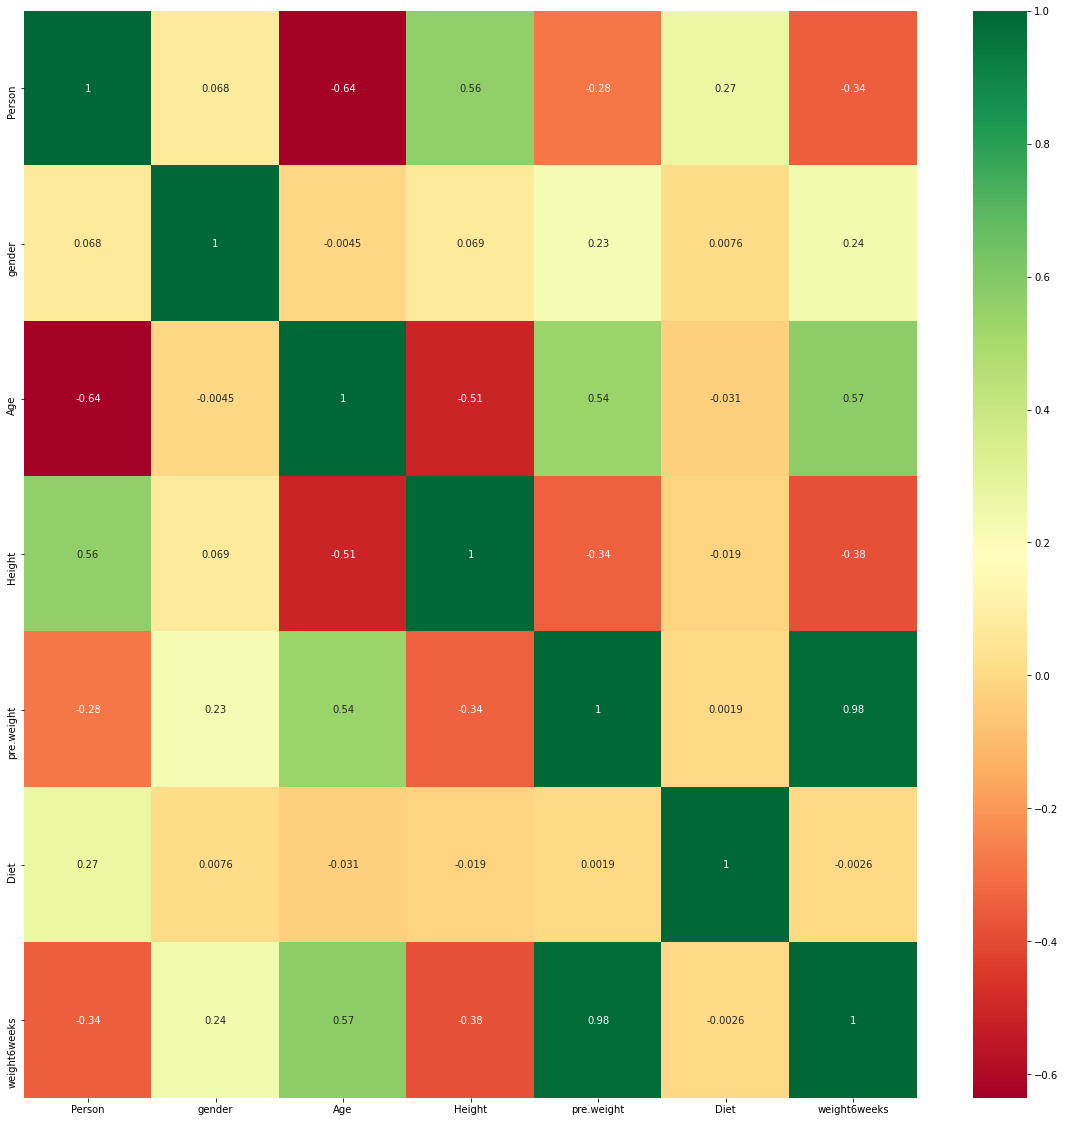

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [48]:
X=final_dataset.iloc[:,:-1].values
Y=final_dataset.iloc[:,5].values

In [49]:
X

array([[  0,  41, 171,   2,  60],
       [  0,  32, 174,   2, 103],
       [  0,  22, 159,   1,  58],
       [  0,  46, 192,   1,  60],
       [  0,  55, 170,   1,  64],
       [  0,  33, 171,   1,  64],
       [  0,  50, 170,   1,  65],
       [  0,  50, 201,   1,  66],
       [  0,  37, 174,   1,  67],
       [  0,  28, 176,   1,  69],
       [  0,  28, 165,   1,  70],
       [  0,  45, 165,   1,  70],
       [  0,  60, 173,   1,  72],
       [  0,  48, 156,   1,  72],
       [  0,  41, 163,   1,  72],
       [  0,  37, 167,   1,  82],
       [  0,  44, 174,   2,  58],
       [  0,  37, 172,   2,  58],
       [  0,  41, 165,   2,  59],
       [  0,  43, 171,   2,  61],
       [  0,  20, 169,   2,  62],
       [  0,  51, 174,   2,  63],
       [  0,  31, 163,   2,  63],
       [  0,  54, 173,   2,  63],
       [  0,  50, 166,   2,  65],
       [  0,  48, 163,   2,  66],
       [  0,  16, 165,   2,  68],
       [  0,  37, 167,   2,  68],
       [  0,  30, 161,   2,  76],
       [  0,  

In [50]:
Y

array([ 60. , 103. ,  54.2,  54. ,  63.3,  61.1,  62.2,  64. ,  65. ,
        60.5,  68.1,  66.9,  70.5,  69. ,  68.4,  81.1,  60.1,  56. ,
        57.3,  56.7,  55. ,  62.4,  60.3,  59.4,  62. ,  64. ,  63.8,
        63.3,  72.7,  77.5,  53. ,  56.4,  60.6,  58.2,  58.2,  61.6,
        60.2,  61.8,  63. ,  62.7,  71.1,  64.4,  68.9,  68.7,  71. ,
        71.6,  70.9,  69.5,  73.9,  71. ,  77.6,  79.1,  81.5,  81.9,
        84.5,  66.8,  72.6,  69.2,  72.5,  72.7,  76.3,  73.6,  72.9,
        71.1,  81.4,  75.7,  68.5,  72.1,  72.5,  77.5,  75.2,  69.4,
        74.5,  80.2,  79.9,  79.7,  77.8,  81.9,  52. ,  51. ,  50. ,
        53. ,  52. ,  51. ,  49.8,  49. ,  48.5,  49.5,  49. ,  48. ,
        87.5,  86.5,  85.5,  88. ,  87. ,  86. ,  97. ,  95. ,  94. ,
        96.5,  95. ,  93.4,  86. ,  87. ,  89. ,  77. ,  78. ,  79. ,
        82. ,  83. ,  84. ,  87. ,  88. ,  89.5,  78. ,  78.5,  79. ,
        83. ,  84. ,  84.5,  86. ,  87. ,  89. ,  77. ,  78. ,  79. ,
        82. ,  83. ,

In [51]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [52]:
X_train

array([[  1,  52, 177,   1,  83],
       [  0,  31, 168,   3,  50],
       [  0,  51, 153,   3,  80],
       [  0,  31, 170,   3,  72],
       [  0,  57, 150,   3,  90],
       [  0,  31, 163,   2,  63],
       [  1,  52, 150,   3,  90],
       [  1,  50, 154,   2,  90],
       [  1,  56, 150,   3,  85],
       [  0,  19, 165,   3,  55],
       [  0,  52, 151,   1,  85],
       [  0,  41, 163,   1,  72],
       [  0,  37, 167,   2,  68],
       [  0,  45, 172,   3,  90],
       [  0,  52, 152,   2,  85],
       [  1,  31, 158,   1,  72],
       [  1,  55, 156,   3,  80],
       [  0,  47, 169,   3, 100],
       [  1,  40, 171,   2,  79],
       [  0,  22, 159,   1,  58],
       [  1,  45, 160,   2,  78],
       [  0,  54, 154,   2,  80],
       [  0,  51, 153,   3,  80],
       [  0,  48, 153,   3,  75],
       [  0,  28, 165,   1,  70],
       [  1,  30, 179,   1,  90],
       [  1,  35, 183,   3,  83],
       [  1,  52, 150,   3,  90],
       [  1,  52, 154,   1,  85],
       [  0,  

In [53]:
Y_train

array([ 79.1,  48.5,  79. ,  71.1,  89. ,  60.3,  89.5,  88. ,  84.5,
        50. ,  82. ,  68.4,  63.3,  85.5,  83. ,  70.9,  79. ,  94. ,
        72.9,  54.2,  72.7,  78. ,  79. ,  68.7,  68.1,  88. ,  80.2,
        89.5,  83. ,  78. ,  83. ,  79. ,  84. ,  88. ,  77.6,  60. ,
        87. ,  83. ,  86. ,  81.4,  83. ,  64.4,  77.5,  71. ,  73.9,
        49. ,  69. ,  82. ,  59.4,  79. ,  87. ,  55. ,  81.1,  52. ,
        89. ,  81.5,  95. ,  77.8,  54. ,  79. ,  84. ,  79. ,  62.2,
        72.5,  79.7,  49.8,  77. ,  87. ,  70.5,  78. ,  84. ,  89.5,
        86.5,  84.5,  66.9,  84.5,  86. ,  61.6,  69.2,  75.7, 103. ,
        86. ,  84.5,  68.9,  77. ,  78. ,  88. ,  56. ,  63. ,  78.5,
        81.9,  78. ,  84. ,  58.2,  72.7,  78. ,  78.5,  56.4,  77. ,
        83. ,  78.5,  60.6,  78. ,  82. ,  87. ,  77.5,  96.5,  52. ,
        51. ,  78.5,  88. ,  78. ,  74.5,  81.9,  64. ,  87. ,  53. ,
        83. ,  86. ,  87. ,  62.7,  72.5,  89. ,  49. ,  75.2,  49.5,
        60.2,  62.4,

In [54]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=10, random_state=0) #n_est=no. of trees
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
regressor.score(X_test, Y_test)

0.97268094709103

In [55]:
X_train

array([[  1,  52, 177,   1,  83],
       [  0,  31, 168,   3,  50],
       [  0,  51, 153,   3,  80],
       [  0,  31, 170,   3,  72],
       [  0,  57, 150,   3,  90],
       [  0,  31, 163,   2,  63],
       [  1,  52, 150,   3,  90],
       [  1,  50, 154,   2,  90],
       [  1,  56, 150,   3,  85],
       [  0,  19, 165,   3,  55],
       [  0,  52, 151,   1,  85],
       [  0,  41, 163,   1,  72],
       [  0,  37, 167,   2,  68],
       [  0,  45, 172,   3,  90],
       [  0,  52, 152,   2,  85],
       [  1,  31, 158,   1,  72],
       [  1,  55, 156,   3,  80],
       [  0,  47, 169,   3, 100],
       [  1,  40, 171,   2,  79],
       [  0,  22, 159,   1,  58],
       [  1,  45, 160,   2,  78],
       [  0,  54, 154,   2,  80],
       [  0,  51, 153,   3,  80],
       [  0,  48, 153,   3,  75],
       [  0,  28, 165,   1,  70],
       [  1,  30, 179,   1,  90],
       [  1,  35, 183,   3,  83],
       [  1,  52, 150,   3,  90],
       [  1,  52, 154,   1,  85],
       [  0,  

In [56]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300, random_state=0) #n_est=no. of trees
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
regressor.score(X_test, Y_test)

0.9748276019010857

In [57]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, Y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, Y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_test, Y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_test, Y_pred), 2)) 
print("R2 score =", round(sm.r2_score(Y_test, Y_pred), 2))

Mean absolute error = 1.07
Mean squared error = 3.54
Median absolute error = 0.08
Explain variance score = 0.97
R2 score = 0.97


In [58]:
#building optimal model using bwd elimination
import statsmodels.api as sm 
final_dataset.tail()

,gender,Age,Height,Diet,preweight,weightafter
187,1,49,153,2,80,78.5
188,1,55,156,3,80,79.0
189,1,52,154,1,85,83.0
190,1,53,152,2,85,84.0
191,1,56,150,3,85,84.5


In [59]:
final_dataset.head()

,gender,Age,Height,Diet,preweight,weightafter
0,0,41,171,2,60,60.0
1,0,32,174,2,103,103.0
2,0,22,159,1,58,54.2
3,0,46,192,1,60,54.0
4,0,55,170,1,64,63.3


In [60]:
X

array([[  0,  41, 171,   2,  60],
       [  0,  32, 174,   2, 103],
       [  0,  22, 159,   1,  58],
       [  0,  46, 192,   1,  60],
       [  0,  55, 170,   1,  64],
       [  0,  33, 171,   1,  64],
       [  0,  50, 170,   1,  65],
       [  0,  50, 201,   1,  66],
       [  0,  37, 174,   1,  67],
       [  0,  28, 176,   1,  69],
       [  0,  28, 165,   1,  70],
       [  0,  45, 165,   1,  70],
       [  0,  60, 173,   1,  72],
       [  0,  48, 156,   1,  72],
       [  0,  41, 163,   1,  72],
       [  0,  37, 167,   1,  82],
       [  0,  44, 174,   2,  58],
       [  0,  37, 172,   2,  58],
       [  0,  41, 165,   2,  59],
       [  0,  43, 171,   2,  61],
       [  0,  20, 169,   2,  62],
       [  0,  51, 174,   2,  63],
       [  0,  31, 163,   2,  63],
       [  0,  54, 173,   2,  63],
       [  0,  50, 166,   2,  65],
       [  0,  48, 163,   2,  66],
       [  0,  16, 165,   2,  68],
       [  0,  37, 167,   2,  68],
       [  0,  30, 161,   2,  76],
       [  0,  

In [61]:
X_train=np.append(arr=np.ones((192,1)).astype(int),values=X,axis=1)
X_train

array([[  1,   0,  41, 171,   2,  60],
       [  1,   0,  32, 174,   2, 103],
       [  1,   0,  22, 159,   1,  58],
       ...,
       [  1,   1,  52, 154,   1,  85],
       [  1,   1,  53, 152,   2,  85],
       [  1,   1,  56, 150,   3,  85]])

In [63]:
X_opt=X[:,[0,1,2,3,4]]#total number of x
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary() #remove the parameters with P>0.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          5.952e+04
Date:                Mon, 15 Mar 2021   Prob (F-statistic):                   2.79e-297
Time:                        20:18:06   Log-Likelihood:                         -397.70
No. Observations:                 192   AIC:                                      805.4
Df Residuals:                     187   BIC:                                      821.7
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5725      0.292      1.963      0.051      -0.003       1.148
x2             0.0616      0.016      3.941      0.000       0.031       0.092
x3            -0.0234      0.005     -4.682      0.000      -0.033      -0.014
x4            -0.0230      0.171     -0.134      0.893      -0.360       0.314
x5             0.9740      0.014     69.372      0.000       0.946       1.002
==============================================================================
Omnibus:                       17.541   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.108
Skew:                          -0.618   Prob(JB):                     1.58e-05
Kurtosis:                       4.111   Cond. No.                         386.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X_opt=X[:,[0,1,2,4]]#total number of x
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary() #remove the parameters with P>0.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          7.480e+04
Date:                Mon, 15 Mar 2021   Prob (F-statistic):                   9.65e-300
Time:                        20:19:45   Log-Likelihood:                         -397.71
No. Observations:                 192   AIC:                                      803.4
Df Residuals:                     188   BIC:                                      816.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5730      0.291      1.970      0.050      -0.001       1.147
x2             0.0616      0.016      3.950      0.000       0.031       0.092
x3            -0.0236      0.005     -4.977      0.000      -0.033      -0.014
x4             0.9738      0.014     69.758      0.000       0.946       1.001
==============================================================================
Omnibus:                       17.953   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.841
Skew:                          -0.626   Prob(JB):                     1.10e-05
Kurtosis:                       4.135   Cond. No.                         386.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
X_opt

array([[  0,  41, 171,  60],
       [  0,  32, 174, 103],
       [  0,  22, 159,  58],
       [  0,  46, 192,  60],
       [  0,  55, 170,  64],
       [  0,  33, 171,  64],
       [  0,  50, 170,  65],
       [  0,  50, 201,  66],
       [  0,  37, 174,  67],
       [  0,  28, 176,  69],
       [  0,  28, 165,  70],
       [  0,  45, 165,  70],
       [  0,  60, 173,  72],
       [  0,  48, 156,  72],
       [  0,  41, 163,  72],
       [  0,  37, 167,  82],
       [  0,  44, 174,  58],
       [  0,  37, 172,  58],
       [  0,  41, 165,  59],
       [  0,  43, 171,  61],
       [  0,  20, 169,  62],
       [  0,  51, 174,  63],
       [  0,  31, 163,  63],
       [  0,  54, 173,  63],
       [  0,  50, 166,  65],
       [  0,  48, 163,  66],
       [  0,  16, 165,  68],
       [  0,  37, 167,  68],
       [  0,  30, 161,  76],
       [  0,  29, 169,  77],
       [  0,  51, 165,  60],
       [  0,  35, 169,  62],
       [  0,  21, 159,  64],
       [  0,  22, 169,  65],
       [  0,  

In [79]:
final_dataset.drop(['Diet'],axis=1,inplace=True)

In [80]:
final_dataset.head()

,gender,Age,Height,preweight,weightafter
0,0,41,171,60,60.0
1,0,32,174,103,103.0
2,0,22,159,58,54.2
3,0,46,192,60,54.0
4,0,55,170,64,63.3


In [81]:
X=final_dataset.iloc[:,:-1].values
Y=final_dataset.iloc[:,4].values

In [82]:
X

array([[  0,  41, 171,  60],
       [  0,  32, 174, 103],
       [  0,  22, 159,  58],
       [  0,  46, 192,  60],
       [  0,  55, 170,  64],
       [  0,  33, 171,  64],
       [  0,  50, 170,  65],
       [  0,  50, 201,  66],
       [  0,  37, 174,  67],
       [  0,  28, 176,  69],
       [  0,  28, 165,  70],
       [  0,  45, 165,  70],
       [  0,  60, 173,  72],
       [  0,  48, 156,  72],
       [  0,  41, 163,  72],
       [  0,  37, 167,  82],
       [  0,  44, 174,  58],
       [  0,  37, 172,  58],
       [  0,  41, 165,  59],
       [  0,  43, 171,  61],
       [  0,  20, 169,  62],
       [  0,  51, 174,  63],
       [  0,  31, 163,  63],
       [  0,  54, 173,  63],
       [  0,  50, 166,  65],
       [  0,  48, 163,  66],
       [  0,  16, 165,  68],
       [  0,  37, 167,  68],
       [  0,  30, 161,  76],
       [  0,  29, 169,  77],
       [  0,  51, 165,  60],
       [  0,  35, 169,  62],
       [  0,  21, 159,  64],
       [  0,  22, 169,  65],
       [  0,  

In [83]:
Y

array([ 60. , 103. ,  54.2,  54. ,  63.3,  61.1,  62.2,  64. ,  65. ,
        60.5,  68.1,  66.9,  70.5,  69. ,  68.4,  81.1,  60.1,  56. ,
        57.3,  56.7,  55. ,  62.4,  60.3,  59.4,  62. ,  64. ,  63.8,
        63.3,  72.7,  77.5,  53. ,  56.4,  60.6,  58.2,  58.2,  61.6,
        60.2,  61.8,  63. ,  62.7,  71.1,  64.4,  68.9,  68.7,  71. ,
        71.6,  70.9,  69.5,  73.9,  71. ,  77.6,  79.1,  81.5,  81.9,
        84.5,  66.8,  72.6,  69.2,  72.5,  72.7,  76.3,  73.6,  72.9,
        71.1,  81.4,  75.7,  68.5,  72.1,  72.5,  77.5,  75.2,  69.4,
        74.5,  80.2,  79.9,  79.7,  77.8,  81.9,  52. ,  51. ,  50. ,
        53. ,  52. ,  51. ,  49.8,  49. ,  48.5,  49.5,  49. ,  48. ,
        87.5,  86.5,  85.5,  88. ,  87. ,  86. ,  97. ,  95. ,  94. ,
        96.5,  95. ,  93.4,  86. ,  87. ,  89. ,  77. ,  78. ,  79. ,
        82. ,  83. ,  84. ,  87. ,  88. ,  89.5,  78. ,  78.5,  79. ,
        83. ,  84. ,  84.5,  86. ,  87. ,  89. ,  77. ,  78. ,  79. ,
        82. ,  83. ,

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [85]:
X_train

array([[  1,  52, 177,  83],
       [  0,  31, 168,  50],
       [  0,  51, 153,  80],
       [  0,  31, 170,  72],
       [  0,  57, 150,  90],
       [  0,  31, 163,  63],
       [  1,  52, 150,  90],
       [  1,  50, 154,  90],
       [  1,  56, 150,  85],
       [  0,  19, 165,  55],
       [  0,  52, 151,  85],
       [  0,  41, 163,  72],
       [  0,  37, 167,  68],
       [  0,  45, 172,  90],
       [  0,  52, 152,  85],
       [  1,  31, 158,  72],
       [  1,  55, 156,  80],
       [  0,  47, 169, 100],
       [  1,  40, 171,  79],
       [  0,  22, 159,  58],
       [  1,  45, 160,  78],
       [  0,  54, 154,  80],
       [  0,  51, 153,  80],
       [  0,  48, 153,  75],
       [  0,  28, 165,  70],
       [  1,  30, 179,  90],
       [  1,  35, 183,  83],
       [  1,  52, 150,  90],
       [  1,  52, 154,  85],
       [  0,  54, 154,  80],
       [  1,  52, 154,  85],
       [  1,  55, 156,  80],
       [  1,  53, 152,  85],
       [  1,  50, 154,  90],
       [  1,  

In [86]:
Y_train

array([ 79.1,  48.5,  79. ,  71.1,  89. ,  60.3,  89.5,  88. ,  84.5,
        50. ,  82. ,  68.4,  63.3,  85.5,  83. ,  70.9,  79. ,  94. ,
        72.9,  54.2,  72.7,  78. ,  79. ,  68.7,  68.1,  88. ,  80.2,
        89.5,  83. ,  78. ,  83. ,  79. ,  84. ,  88. ,  77.6,  60. ,
        87. ,  83. ,  86. ,  81.4,  83. ,  64.4,  77.5,  71. ,  73.9,
        49. ,  69. ,  82. ,  59.4,  79. ,  87. ,  55. ,  81.1,  52. ,
        89. ,  81.5,  95. ,  77.8,  54. ,  79. ,  84. ,  79. ,  62.2,
        72.5,  79.7,  49.8,  77. ,  87. ,  70.5,  78. ,  84. ,  89.5,
        86.5,  84.5,  66.9,  84.5,  86. ,  61.6,  69.2,  75.7, 103. ,
        86. ,  84.5,  68.9,  77. ,  78. ,  88. ,  56. ,  63. ,  78.5,
        81.9,  78. ,  84. ,  58.2,  72.7,  78. ,  78.5,  56.4,  77. ,
        83. ,  78.5,  60.6,  78. ,  82. ,  87. ,  77.5,  96.5,  52. ,
        51. ,  78.5,  88. ,  78. ,  74.5,  81.9,  64. ,  87. ,  53. ,
        83. ,  86. ,  87. ,  62.7,  72.5,  89. ,  49. ,  75.2,  49.5,
        60.2,  62.4,

In [87]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=10, random_state=0) #n_est=no. of trees
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
regressor.score(X_test, Y_test)

0.9685417922297729

In [88]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300, random_state=0) #n_est=no. of trees
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
regressor.score(X_test, Y_test)

0.9715003647438

In [89]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=1000, random_state=0) #n_est=no. of trees
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
regressor.score(X_test, Y_test)

0.9711551649977048

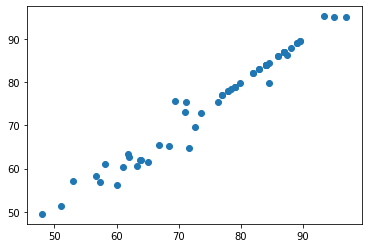

In [90]:
plt.scatter(Y_test,Y_pred)